In [1]:
import sys
sys.path.append('C:\\0_Academy\\VScode\\00_Function\\')
import datetime
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#read file
from A1_read_data import read_csv_data
folder = '1.1 ALL windspeed/'
file_name = 'WIND_95m_1605-1912.csv'
data = read_csv_data(folder,file_name)

Import 'WIND_95m_1605-1912.csv'Done


In [3]:
data02 = data[['DateTime','WS95','WD95n']].copy()
data02['Year']   = data['DateTime'].apply(lambda x: x.year)
data02['Month']  = data['DateTime'].apply(lambda x: x.month)
seasons = [(month%12 + 3)//3 for month in range(1, 13)]
month_to_season = dict(zip(range(1,13), seasons))
data02['Season']= data02['Month'].apply(lambda x:month_to_season[x])
Season_dict = {1:'Winter',2:'Spring',3:'Summer',4:'Autumn'}
data02['Seasons'] = data02['Season'].apply(lambda x:Season_dict[x])
#data01['Monsoon']= data01['Month'].isin([1,2,3,10,11,12]) 

In [4]:
import seaborn as sns
from A3_select_data import DataRange
data02 = DataRange(data02,"2017-01-01", "2020-01-01")

In [5]:
data02

,DateTime,WS95,WD95n,Year,Month,Season,Seasons
0,2017-01-01 00:00:00,9.124528,15.934098,2017,1,1,Winter
1,2017-01-01 00:01:00,8.686667,17.366490,2017,1,1,Winter
2,2017-01-01 00:02:00,8.651667,16.633296,2017,1,1,Winter
3,2017-01-01 00:03:00,9.128333,17.000008,2017,1,1,Winter
4,2017-01-01 00:04:00,9.288333,17.666635,2017,1,1,Winter
...,...,...,...,...,...,...,...
1576795,2019-12-31 23:55:00,16.734333,18.951843,2019,12,1,Winter
1576796,2019-12-31 23:56:00,19.018000,19.341510,2019,12,1,Winter
1576797,2019-12-31 23:57:00,18.783167,19.776749,2019,12,1,Winter
1576798,2019-12-31 23:58:00,17.868000,19.697138,2019,12,1,Winter


In [6]:
from A2_add_variable import Convert_Angle01, Convert_Angle
def Convert_Angle01(data,Height):
    # from -pi~pi to 0~2pi
    pi = np.pi
    wd = data['WD{}n'.format(Height)].copy()
    logic    = wd.apply(lambda x: x>0)
    wd_new   = np.where(logic,wd, wd+360 )
    data['WD{}'.format(Height)] = wd_new
    return data
data02 = Convert_Angle01(data02,95)
data02['WD95r'] = data02['WD95']-360

In [7]:
from D2_TS_plot import PLOT_WholeYear

In [8]:
def PLOT_WholeYear(DATA,year):
    mon_list = ["01","02","03","04","05","06","07","08","09","10","11","12"]
    logicY= (DATA["DateTime"].apply(lambda x: x.year))==(year)
    df    = DATA[logicY].copy()
    df.reset_index(inplace=True,drop=True)
    
    fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True, figsize=(20, 10), gridspec_kw = {'wspace':0, 'hspace':0.05})
    fig.subplots_adjust(hspace=0.4)
    major_c = 'navy'
    minor_c = 'lightsteelblue'
    ax1.plot(df['DateTime'], df['WS95'],c=major_c)
    ax2.scatter(df['DateTime'],df['WD95'],s=1,c=minor_c)
    ax2.scatter(df['DateTime'],df['WD95r'],s=1,c=minor_c)
    ax2.scatter(df['DateTime'],df['WD95n'],s=1,c=major_c)
    
    ax1.set_title('Time Series for Wind Speed and Wind Direction (Year {})'.format(year),fontweight='bold',size=25)
    ax1.tick_params(axis="x", labelsize=20,rotation=0)
    ax1.set_ylabel('Wind Speed (m/s)',fontsize=20)
    ax1.tick_params(axis="y", labelsize=20)
    
    u1 = df['DateTime'].iloc[0]
    u2 = df['DateTime'].iloc[-1]
    ax1.set_xlim([u1,u2])
    ax1.set_xticklabels(mon_list)
    ax1.set_ylim([0,35])
    ax1.set_yticks([0,5,10,15,20,25,30,35])
    ax1.grid(True)
    
    #ax2.set_title('Wind Direction (°)',fontweight='bold',size=25)
    ax2.set_xticklabels(mon_list)
    ax2.tick_params(axis="x", labelsize=20,rotation=0)
    ax2.tick_params(axis="y", labelsize=20)
    ax2.set_ylabel('Wind Direction (°)',fontsize=20)
    ax2.set_xlim([u1,u2])
    ax2.set_ylim([-360,360])
    ax2.set_yticks([-360,-270,-180,-90,0,90,180,270,360])
    ax2.grid(True)
    plt.show()

In [14]:
def PLOT_WholeYear(DATA,year):
    mon_list = ["01","02","03","04","05","06","07","08","09","10","11","12"]
    logicY= (DATA["DateTime"].apply(lambda x: x.year))==(year)
    df    = DATA[logicY].copy()
    df.reset_index(inplace=True,drop=True)
    
    fig, (ax1, ax2) = plt.subplots(2, 1,sharex=True, figsize=(21, 10), gridspec_kw = {'wspace':0, 'hspace':0.075})
    fig.subplots_adjust(hspace=0.4)
    major_c = 'black'
    ax1.plot(df['DateTime'], df['WS95'],c=major_c)
    ax2.scatter(df['DateTime'],df['WD95n'],s=1,c=major_c)
    
    ax1.set_title('Time Series for Wind Speed and Wind Direction (Year {})'.format(year),fontweight='bold',size=25)
    ax1.set_ylabel('Wind Speed (m/s)',fontsize=25)
    ax1.tick_params(axis="y", labelsize=25)
    
    u1 = df['DateTime'].iloc[0]
    u2 = df['DateTime'].iloc[-1]
    ax1.set_xlim([u1,u2])
    ax1.set_xticklabels(mon_list)
    ax1.set_ylim([0,35])
    ax1.set_yticks([0,5,10,15,20,25,30,35])
    ax1.grid(True)
    ax2.set_xticklabels(mon_list)
    ax2.tick_params(axis="x", labelsize=25,rotation=0)
    ax2.tick_params(axis="y", labelsize=25)
    ax2.set_ylabel('Wind Direction (°)',fontsize=25)
    ax2.set_xlim([u1,u2])
    ax2.set_ylim([-180,180])
    ax2.set_yticks([-180,-135,-90,-45,0,45,90,135,180])
    ax2.grid(True)
    plt.show()

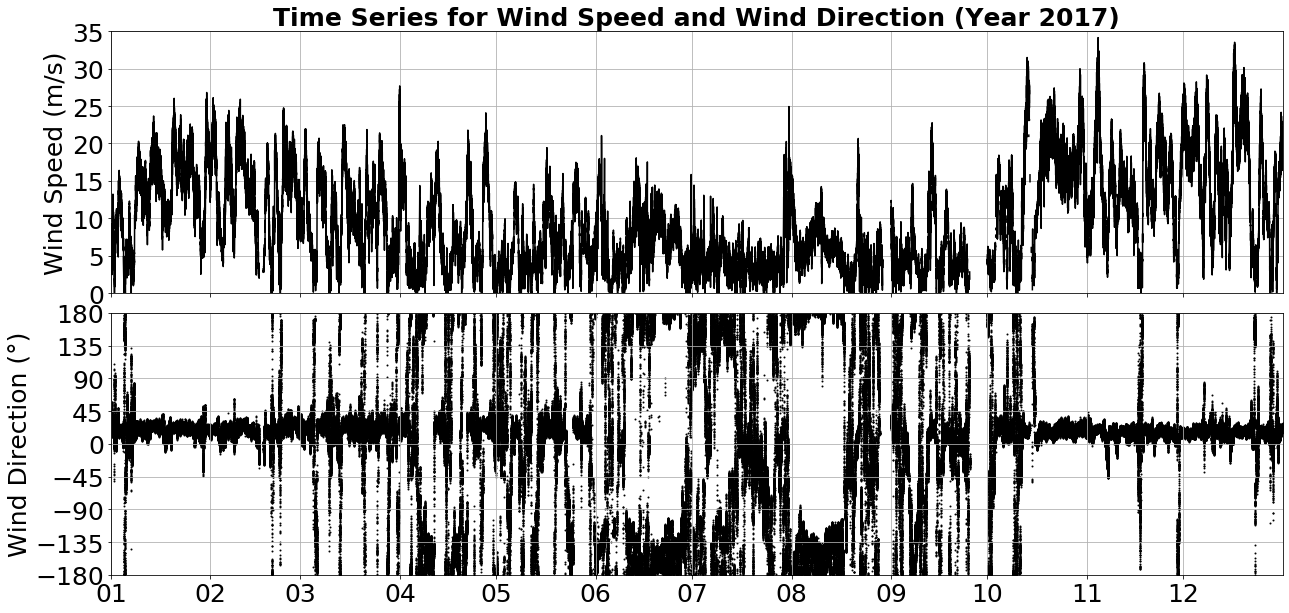

In [15]:
PLOT_WholeYear(data02,2017)

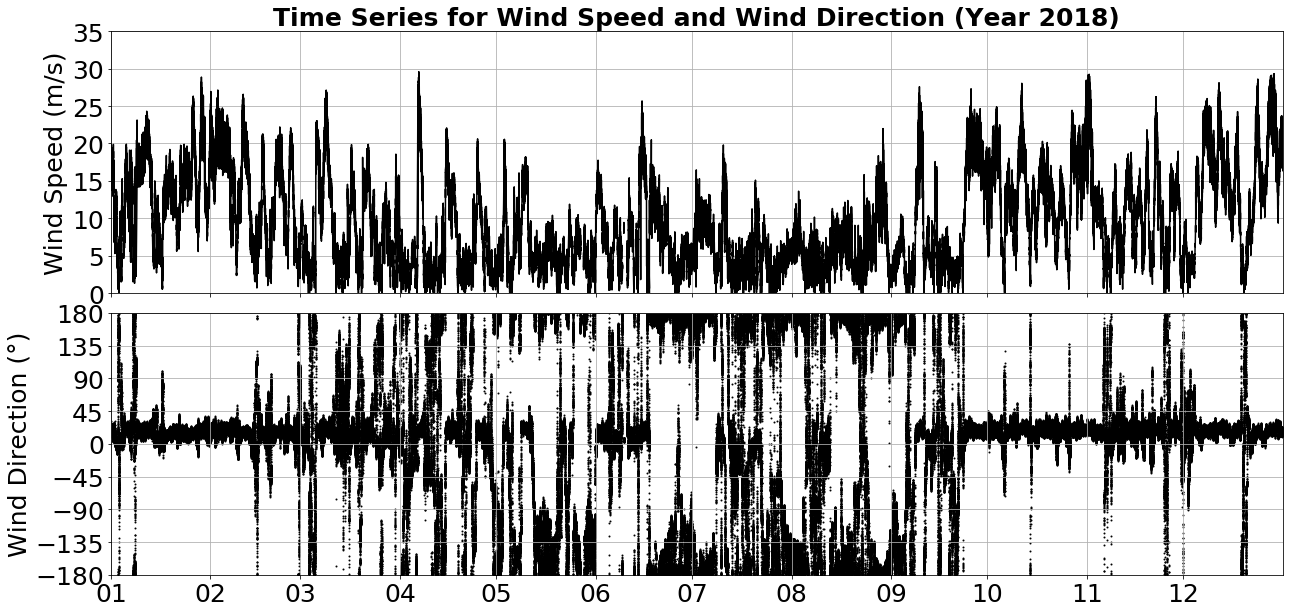

In [16]:
PLOT_WholeYear(data02,2018)

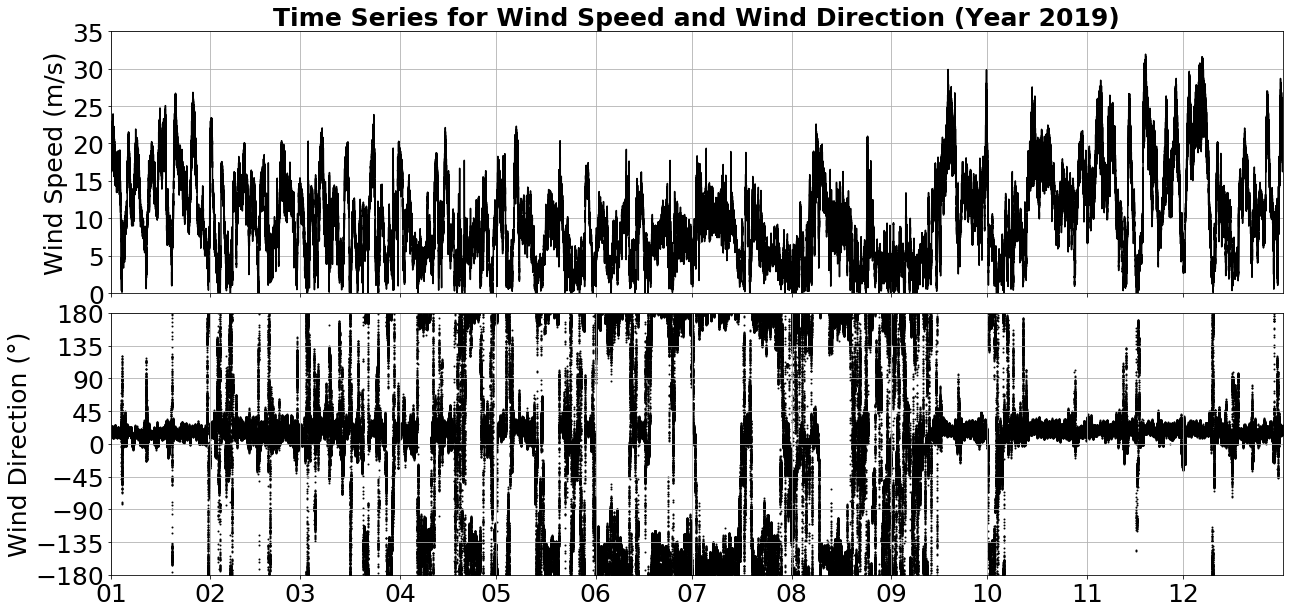

In [17]:
PLOT_WholeYear(data02,2019)